In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the datasets
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')


In [7]:
# Display the first few rows of each dataset for a quick overview

client_data_head = client_data.head()

price_data_head = price_data.head()

(client_data_head, price_data_head)


(                                 id                     channel_sales  \
 0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
 1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
 2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
 3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
 4  149d57cf92fc41cf94415803a877cb4b                           MISSING   
 
    cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
 0         0         54946                0  2013-06-15  2016-06-15   
 1      4660             0                0  2009-08-21  2016-08-30   
 2       544             0                0  2010-04-16  2016-04-16   
 3      1584             0                0  2010-03-30  2016-03-30   
 4      4425             0              526  2010-01-13  2016-03-07   
 
   date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
 0      2015-11-01   2015-06-23               0.

In [17]:
# Examine data types for each column in both datasets
client_data_dtypes = client_data.dtypes
price_data_dtypes = price_data.dtypes

# Generate descriptive statistics for both datasets
client_data_describe = client_data.describe(include='all', datetime_is_numeric=True)
price_data_describe = price_data.describe(include='all', datetime_is_numeric=True)

(client_data_dtypes, price_data_dtypes, client_data_describe, price_data_describe)


(id                                 object
 channel_sales                      object
 cons_12m                            int64
 cons_gas_12m                        int64
 cons_last_month                     int64
 date_activ                         object
 date_end                           object
 date_modif_prod                    object
 date_renewal                       object
 forecast_cons_12m                 float64
 forecast_cons_year                  int64
 forecast_discount_energy          float64
 forecast_meter_rent_12m           float64
 forecast_price_energy_off_peak    float64
 forecast_price_energy_peak        float64
 forecast_price_pow_off_peak       float64
 has_gas                            object
 imp_cons                          float64
 margin_gross_pow_ele              float64
 margin_net_pow_ele                float64
 nb_prod_act                         int64
 net_margin                        float64
 num_years_antig                     int64
 origin_up 

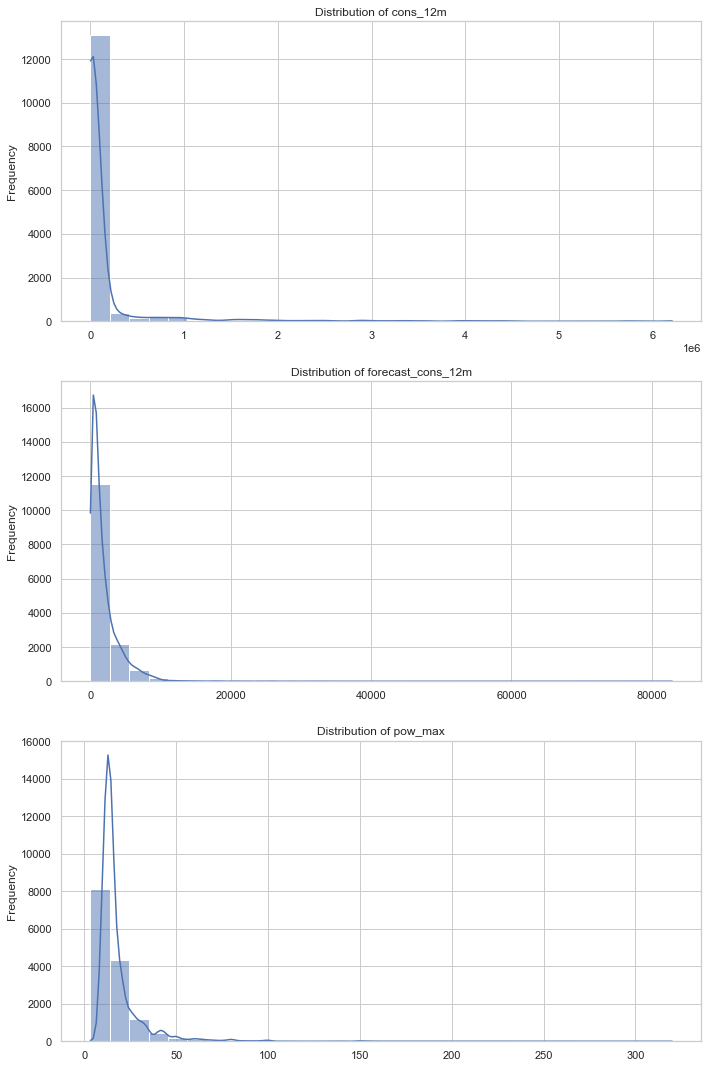

In [19]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define a list of key numerical columns to visualize from the customer data
numerical_columns = ['cons_12m', 'forecast_cons_12m', 'pow_max']

# Create distribution plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 15))

for i, col in enumerate(numerical_columns):
    sns.histplot(client_data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


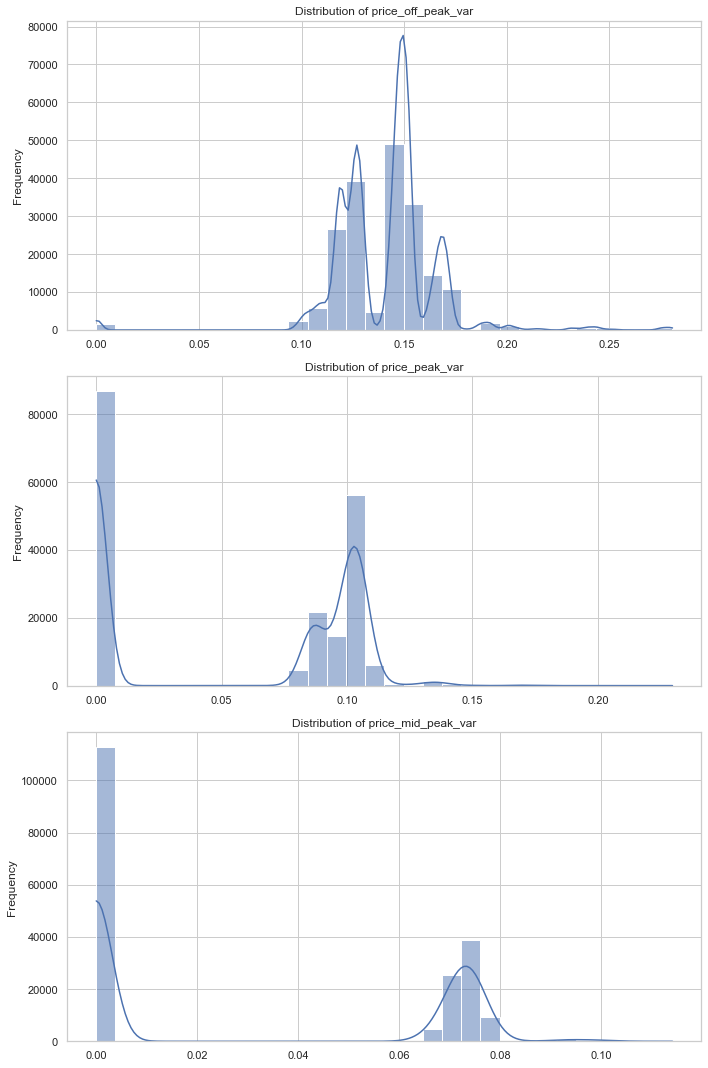

In [20]:
# Define a list of key numerical columns to visualize from the price data
price_columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']

# Create distribution plots for pricing data
fig, axes = plt.subplots(len(price_columns), 1, figsize=(10, 15))

for i, col in enumerate(price_columns):
    sns.histplot(price_data[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


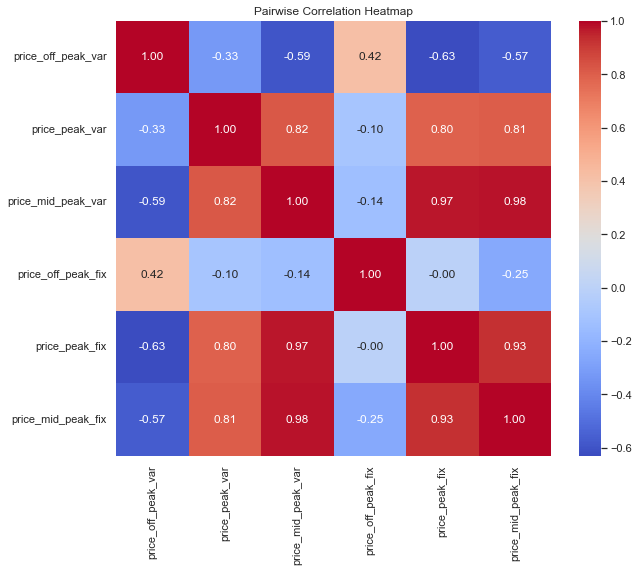

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = price_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()


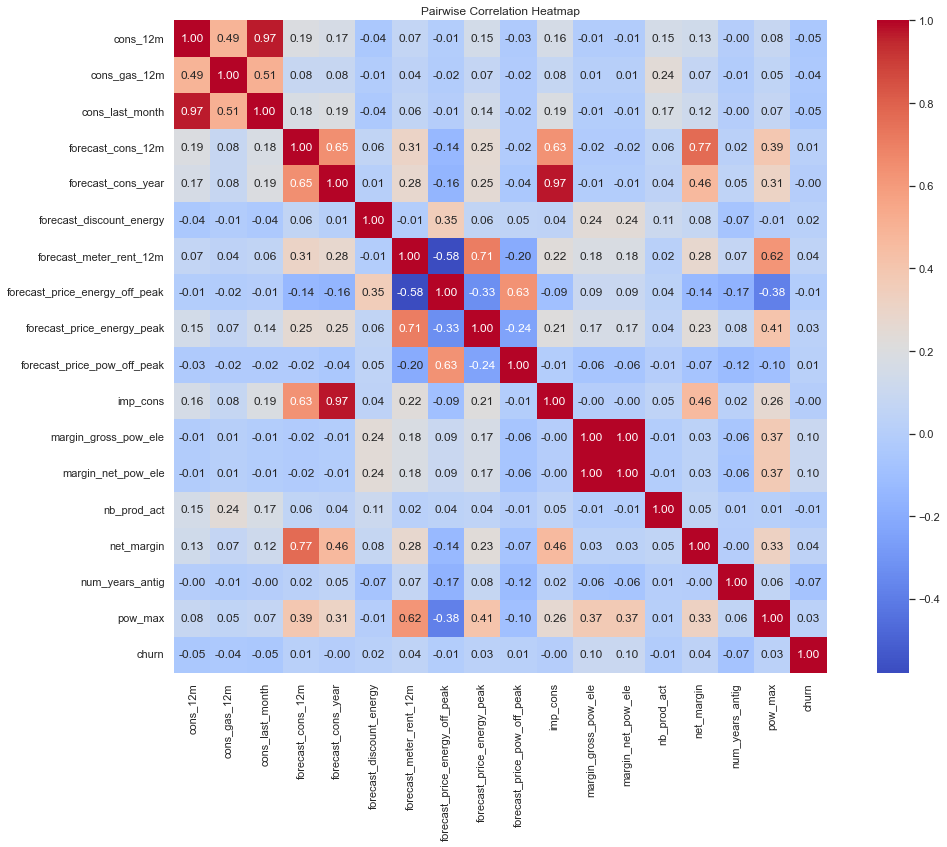

In [24]:
correlation_matrix = client_data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()